## before this notebook u should see powebi '01-EDA' , powerbi is very usefull to visualize the data well spcially that most of data have many unique values (more than 2000 in some columns ) 

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df = pd.read_csv('..\datasets\dataset.csv')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## lets start with lead_source columns 

In [4]:
df['lead_source'].unique()

array(['google', 'facebook', 'app', 'organic search', 'landing page',
       'website', 'phone', 'sms', 'whatsapp', 'propertyfinder',
       'r.search.yahoo.com', 'vodafone', 'unknown', 'intercom', 'hotline',
       'direct traffic', 'client referral', 'organic form',
       'google/landing page', 'organic form direct', 'm.nearbyme.io',
       'referral', 'ecosia.org', 'egyptianstreets.com',
       'management referral', 'search.yahoo.com', 'call center resale',
       'google-landing pages', 'omar bebars/referral',
       'top component form', 'mobile app', 'personal', 'personal/ghanima',
       'client/referral', 'com.google.android.gm', 'personal aly',
       'us.search.yahoo.com', 'bing.com', 'referral from nadine amr',
       'fb messenger', 'www-cooingestate-com.cdn.ampproject.org',
       'com.google.android.googlequicksearchbox',
       'social buildingz campaign', 'int.search.myway.com',
       'personal/referral', 'smbsalesimplementation.my.salesforce.com',
       'newchat.kt

### from lead source report in 01-EDA powerbi , show that we have many values with the same source so i start to collect all values that have the same source by hand and cluster them , lets see example of that 

In [6]:
Facebook =['facebook' , 'fb comment' , 'fb messenger']
df.lead_source.value_counts()[Facebook]

facebook        51267
fb comment          2
fb messenger        7
Name: lead_source, dtype: int64

In [7]:
Website =['landing page', 'm.nearbyme.io','ecosia.org','egyptianstreets.com', 'ventsmagazine.com',
          'timebusinessnews.com', 'realitypaper.com','ampproject.org', 'newshunt360.com', 
          'english.ahram.org.eg' , 'akhbarak.net', 'url-opener.com', 'semrush.com', 
          'acgdigitalmarketing.com', 'app.neilpatel.com', 'website unkown', 'website',
          'residencestyle.com', 'egyptinnovate.com', 'www-cooingestate-com.cdn.ampproject.org', 
          'int.search.myway.com', 'bing.com','smbsalesimplementation.my.salesforce.com',
          'newchat.ktree.org', 'duckduckgo.com', 'realestatechamber-eg.com', 'criteo', 'youtube.com',
          'console.firebase.google.com', 'apps.apple.com','top.criteo.com','vercel.com',
          'blog', 'newsletter', 'tishare.com','blogwritr.com','m.akhbarelyom.com', 'form src=newsletter']
df.lead_source.value_counts()[Website]

landing page                                1147
m.nearbyme.io                                  1
ecosia.org                                     2
egyptianstreets.com                            7
ventsmagazine.com                              3
timebusinessnews.com                           6
realitypaper.com                               2
ampproject.org                                 1
newshunt360.com                                4
english.ahram.org.eg                           3
akhbarak.net                                   1
url-opener.com                                 2
semrush.com                                    7
acgdigitalmarketing.com                       10
app.neilpatel.com                              1
website unkown                                 6
website                                     5184
residencestyle.com                             1
egyptinnovate.com                              1
www-cooingestate-com.cdn.ampproject.org        2
int.search.myway.com

 ## method_of_contact column have the same idea of lead_source column so will do same 

In [8]:
df['method_of_contact'].unique()

array(['generic form', 'facebook', 'top compounds form', 'whatsapp',
       'organic form', 'form adwords', 'phone', 'website',
       'r.search.yahoo.com', 'vodafone', 'app', 'intercom',
       'organic form direct', 'client referral', 'facebook page referral',
       'm.nearbyme.io', 'referral', 'ecosia.org', 'egyptianstreets.com',
       'management referral', 'search.yahoo.com', 'google',
       'call center resale', 'facebook messenger', 'generic contact us',
       'omar bebars/referral', 'form facebook', 'top component form',
       'l.facebook.com', 'personal', 'facebook message',
       'facebook comment', 'personal/ghanima', 'client/referral',
       'com.google.android.gm', 'personal aly', 'us.search.yahoo.com',
       'bing.com', 'referral from nadine amr', 'fb messenger',
       'www-cooingestate-com.cdn.ampproject.org',
       'com.google.android.googlequicksearchbox',
       'social buildingz campaign', 'int.search.myway.com',
       'lm.facebook.com', 'personal/referral

In [9]:
Instegram = ['instagram', 'instagram messenger', 'instagram message', 'instagram comment' ]
df['method_of_contact'].value_counts()[Instegram]

instagram               3
instagram messenger    21
instagram message       4
instagram comment       8
Name: method_of_contact, dtype: int64

### wil cluster each method that have the same meaning togther , but should care with values like timestamp and url links this was so messy to me 

# ad_group column

In [10]:
df['ad_group'].value_counts()

none                                                                                39835
mountain view october - khaleeji lookalike 3%                                         995
mountain view october - general audience with investment/real estate interests        697
aura apartments - general audience real estate interests                              550
the lakes bloomfields - khaleeji lookalike                                            473
il bosco city - real estate interest                                                  442
il bosco city - khaleeji lookalike                                                    430
sodic east - general audience with real estate interests                              389
belle vie - general audience real estate interests                                    382
o west - western audience                                                             350
mivida blue views residences - general audience real estate interests                 319
marassi - 

In [12]:
len(df['ad_group'].unique())

2481

### here i can't apply the idea of hand cluster it so big and have 2481 unique values , so i tried to study them will and try to cluster them in groups based on reach so each ad_group make high reach , meduim or low 
### i tried to choose reach values carefully to make balance in the count of lead in each group so after try alot   i will decided the values 

In [13]:
count =df['ad_group'].value_counts().to_frame()
high_ad=list(count[(count['ad_group']<39835) & (count['ad_group']>350)].index)

In [14]:
df_high_ad = df[df['ad_group'].isin(high_ad)]

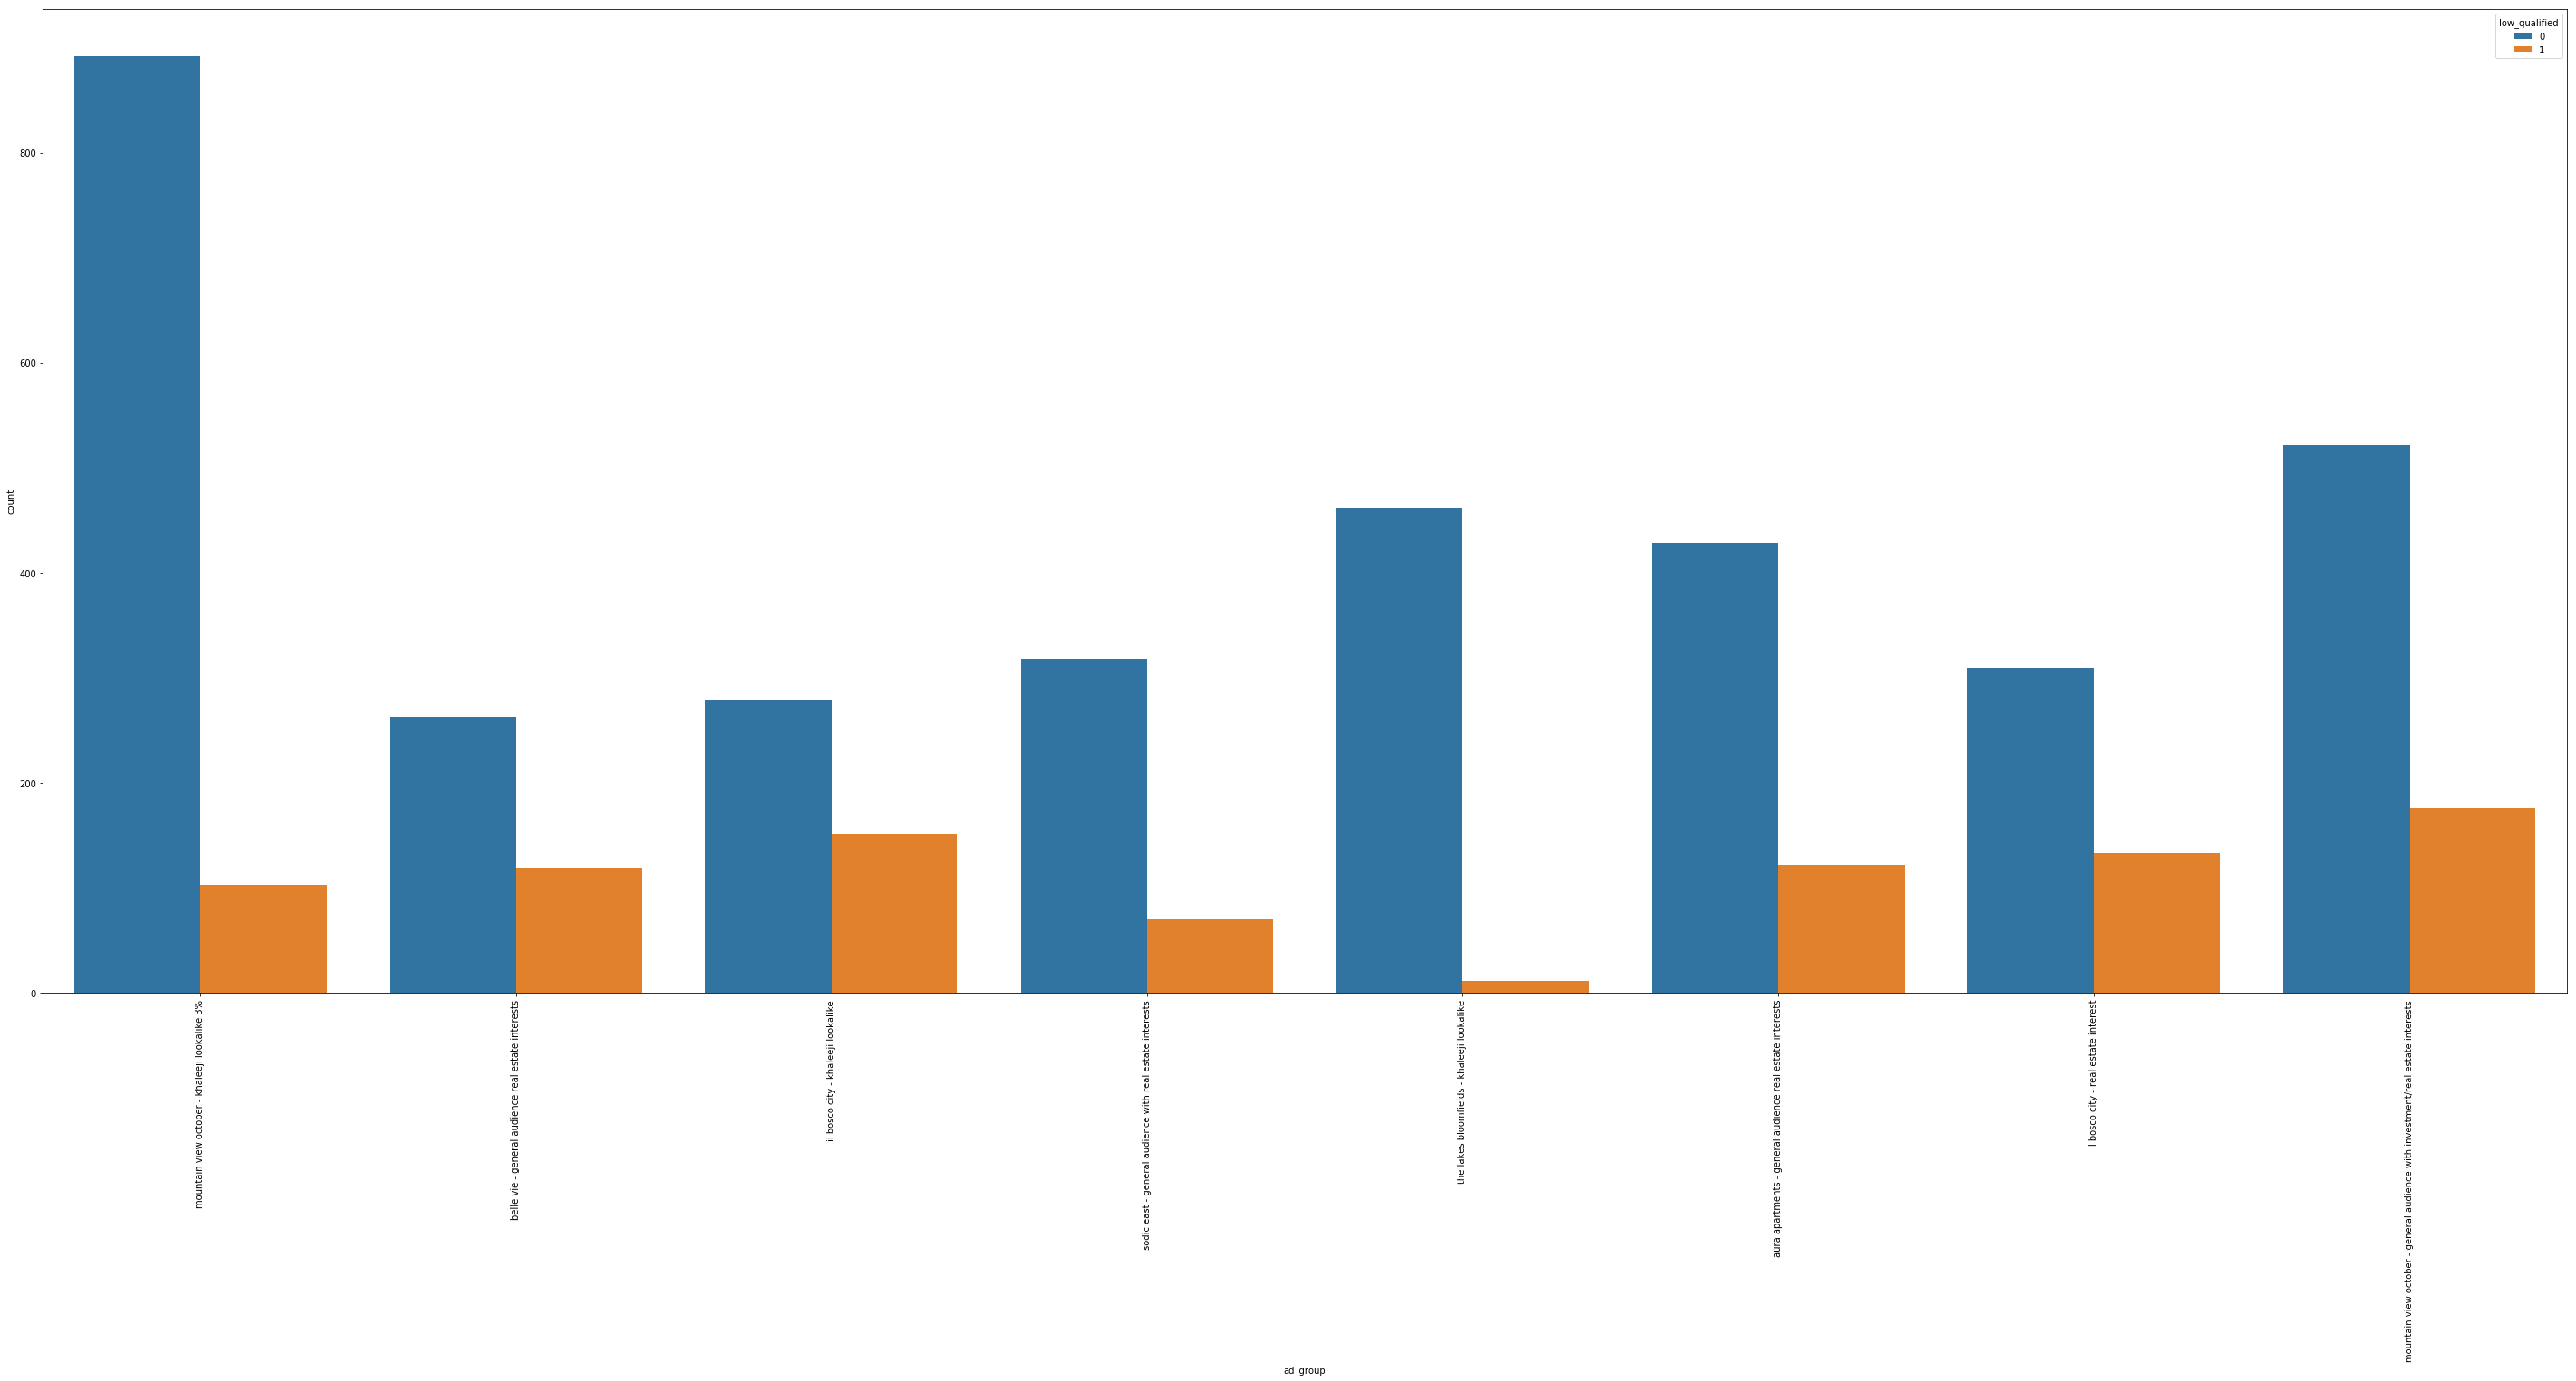

In [15]:
plt.figure(figsize=(50, 20))
plt.xticks(rotation='vertical')
plt.rcParams.update({'font.size': 10})
sns.countplot(x='ad_group',hue='low_qualified' , data = df_high_ad)
plt.show()

### reapeat this with meduim and low and use plots to see how it affect on low_qualified also powerbi reports in 01-EDA helps a lot 

### For campaign colimn will do same what i do with ad_group column 

In [16]:
df['campaign'].value_counts()

none                                                         21601
(none)                                                        2784
google_cpc                                                    2623
mountain view - lead generation - cooing 3                    1586
emaar - lead generation - cooing 3                            1431
emaar misr - lead generation - cooing 2 - new                 1428
misr italia - lead generation - cooing 1 - new                1403
sodic - lead generation - new - cooing 3                      1345
mountain view - lead generation - cooing 4                    1310
sodic - lead generation - new - cooing 2                      1281
dev_-_palm_hills                                              1113
emaar - lead generation - cooing 4 - new                       994
dev_-_dorra                                                    990
palm hills - lead generation - cooing 3 - new                  966
palm hills - lead generation - cooing 2 - new                 

In [17]:
len(df['campaign'].unique())

762

In [18]:
count =df['campaign'].value_counts().to_frame()
med_campaign = list(count[(count['campaign'] <= 500) & (count['campaign']>100)].index)

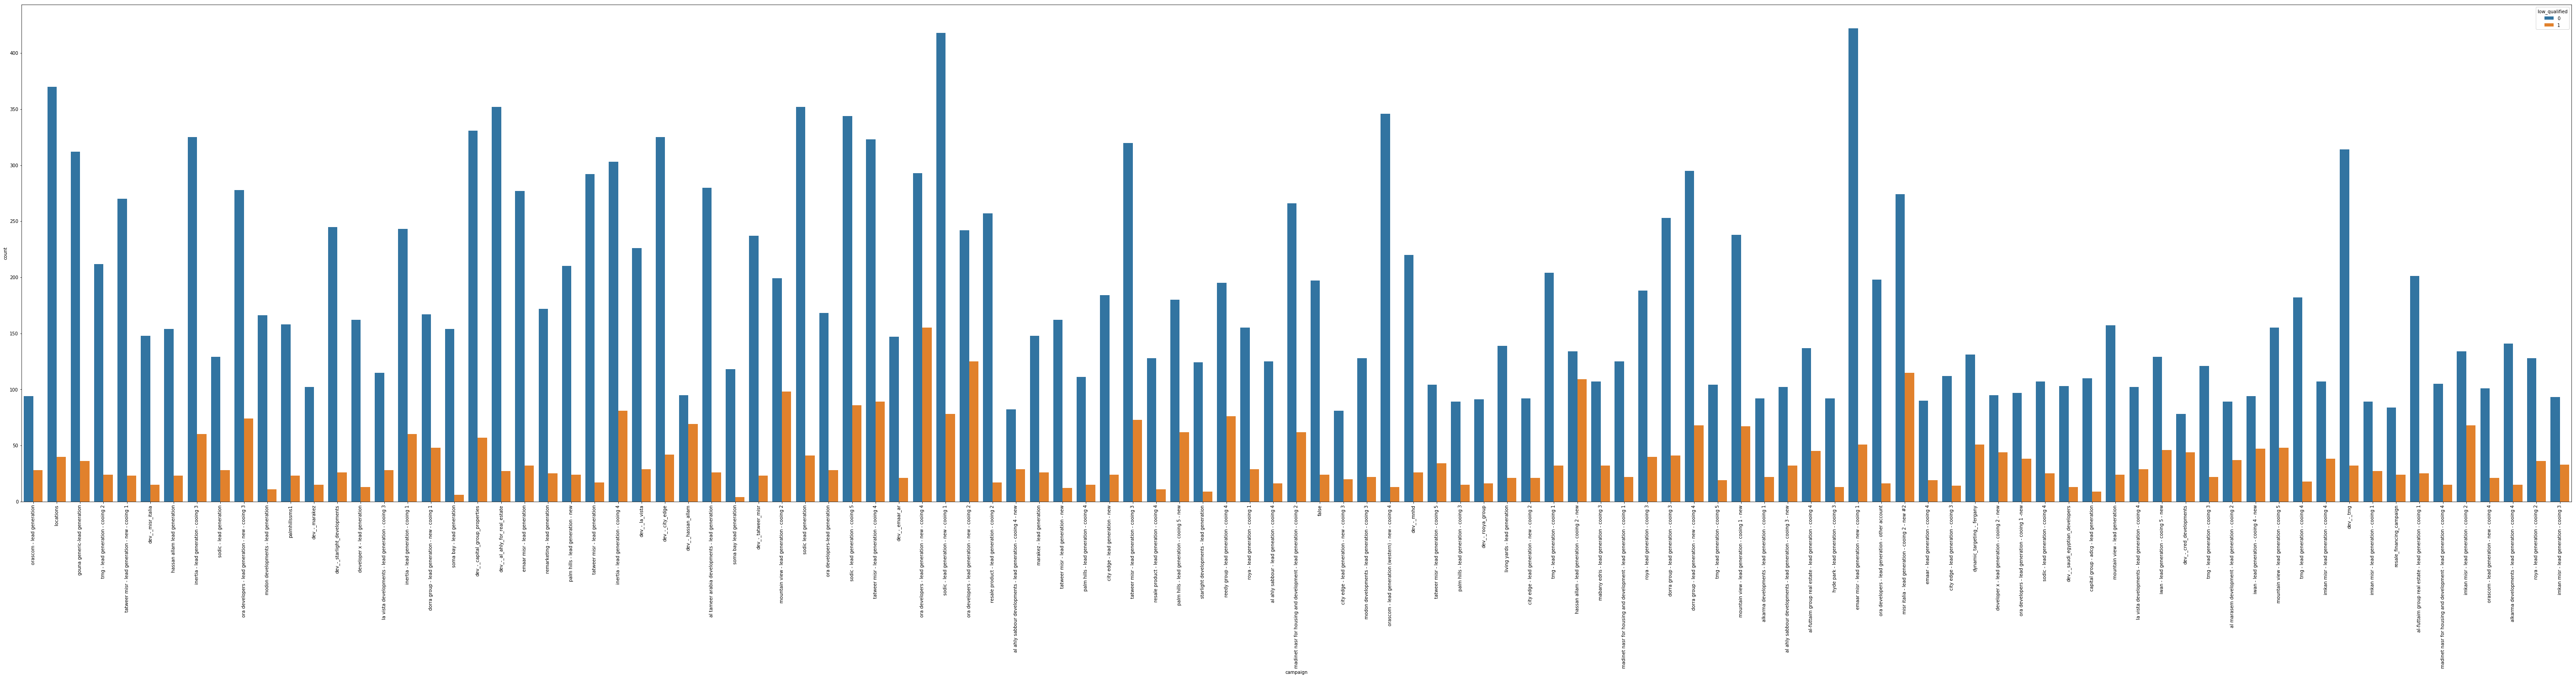

In [20]:
df_med_comp = df[df['campaign'].isin(med_campaign)]
plt.figure(figsize=(100, 20))
plt.xticks(rotation='vertical')
plt.rcParams.update({'font.size': 10})
sns.countplot(x='campaign',hue='low_qualified' , data = df_med_comp)
plt.show()

# Now lets do data processing and get dataset ready to feed in ml model